In [1]:
# Leer archivo csv, separado por ";"
#df_dist1 <- read.csv(file="corral_2017-12-05_exp-1min.csv", header=TRUE, sep=";", stringsAsFactors=FALSE)
df_dist1 <- read.csv(file="9am.csv", header=TRUE, sep=",", stringsAsFactors=FALSE)
df_dist2 <- read.csv(file="930.csv", header=TRUE, sep=",", stringsAsFactors=FALSE)


In [2]:
str(df_dist1)
str(df_dist2)
#head(df_dist1)


'data.frame':	18000 obs. of  57 variables:
 $ DATAH                   : chr  "DATA" "DATA" "DATA" "DATA" ...
 $ Seconds                 : int  1516032000 1516032000 1516032000 1516032000 1516032000 1516032000 1516032000 1516032000 1516032000 1516032000 ...
 $ Nanoseconds             : int  0 100000000 200000000 300000000 400000000 500000000 600000000 700000000 800000000 900000000 ...
 $ Sequence.Number         : int  282461592 282461622 282461652 282461682 282461712 282461742 282461772 282461802 282461832 282461862 ...
 $ Diagnostic.Value        : int  8191 8191 8191 8191 8191 8191 8191 8191 8191 8191 ...
 $ Diagnostic.Value.2      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Date                    : chr  "15/01/2018" "15/01/2018" "15/01/2018" "15/01/2018" ...
 $ Time                    : chr  "09:00:00.0" "09:00:00.1" "09:00:00.2" "09:00:00.3" ...
 $ CO2.Absorptance         : num  0.0798 0.0798 0.0798 0.0798 0.0798 ...
 $ H2O.Absorptance         : num  0.0315 0.0315 0.0315 0.0315 0.0314 ...
 $ 

In [3]:
df_corral1 <- subset(df_dist1, select=c("Time", "CH4..umol.mol.", "CH4.Signal.Strength"))
names(df_corral1) <- c("Time", "Concentracion_CH4", "Intensidad_de_Señal")
df_corral2 <- subset(df_dist2, select=c("Time", "CH4..umol.mol.","CH4.Signal.Strength"))
names(df_corral2) <- c("Time", "Concentracion_CH4", "Intensidad_de_Señal")
head(df_corral1)
str(df_corral1)
head(df_corral2)
str(df_corral2)


Time,Concentracion_CH4,Intensidad_de_Señal
09:00:00.0,2.16598,14.7279
09:00:00.1,2.15553,14.7148
09:00:00.2,2.16228,14.6086
09:00:00.3,2.15610,15.8079
09:00:00.4,2.16502,15.6407
09:00:00.5,2.15769,15.4606


'data.frame':	18000 obs. of  3 variables:
 $ Time               : chr  "09:00:00.0" "09:00:00.1" "09:00:00.2" "09:00:00.3" ...
 $ Concentracion_CH4  : num  2.17 2.16 2.16 2.16 2.17 ...
 $ Intensidad_de_Señal: num  14.7 14.7 14.6 15.8 15.6 ...


Time,Concentracion_CH4,Intensidad_de_Señal
09:30:00.0,2.07558,15.9122
09:30:00.1,2.07034,15.9144
09:30:00.2,2.08116,16.3730
09:30:00.3,2.06593,15.1778
09:30:00.4,2.06615,15.5188
09:30:00.5,2.07117,15.1135


'data.frame':	18000 obs. of  3 variables:
 $ Time               : chr  "09:30:00.0" "09:30:00.1" "09:30:00.2" "09:30:00.3" ...
 $ Concentracion_CH4  : num  2.08 2.07 2.08 2.07 2.07 ...
 $ Intensidad_de_Señal: num  15.9 15.9 16.4 15.2 15.5 ...


In [4]:
options(digits.secs = 3)
df_corral1$Time <- as.POSIXct(df_corral1$Time, format="%H:%M:%OS")
df_corral2$Time <- as.POSIXct(df_corral2$Time, format="%H:%M:%OS")


In [5]:
# verificar estructura
str(df_corral1)
str(df_corral2)

'data.frame':	18000 obs. of  3 variables:
 $ Time               : POSIXct, format: "2018-05-21 09:00:00.0" "2018-05-21 09:00:00.0" ...
 $ Concentracion_CH4  : num  2.17 2.16 2.16 2.16 2.17 ...
 $ Intensidad_de_Señal: num  14.7 14.7 14.6 15.8 15.6 ...
'data.frame':	18000 obs. of  3 variables:
 $ Time               : POSIXct, format: "2018-05-21 09:30:00.0" "2018-05-21 09:30:00.0" ...
 $ Concentracion_CH4  : num  2.08 2.07 2.08 2.07 2.07 ...
 $ Intensidad_de_Señal: num  15.9 15.9 16.4 15.2 15.5 ...


In [6]:
# Nombres de columnas
names(df_corral1)

[1] "Time"                "Concentracion_CH4"   "Intensidad_de_Señal"

In [7]:
# date (X), time (X.1), DOY (X.2) 
# Flujos: co2_flux (X.11), ch4_flux (X.15)
# Mixing ratios: co2_mixing_ratio (X.24), ch4_mixing_ratio (X.34)
# Time lags: co2_time_lag (X.25), ch4_time_lag (X.35)
# RH (X.47)
# u* (turbulence)
# La velocidad del viento y dirección: wind_speed (X.54), wind_dir (X.56)
# Convertir columnas a numérico
require(dplyr)
# Select date, time, DOY, co2_flux, ch4_flux, co2_mixing_ratio, co2_time_lag, 
#        ch4_mixing_ratio, ch4_time_lag, wind_speed, wind_dir 
#             

#df_corral1 <- subset(df_dist1, select=c("X", "X.1", "X.2", "X.11", "X.15", "X.24", "X.25", 
#                                      "X.34", "X.35", "X.54", "X.56", "turbulence" ))

#df_corral1 <- subset(df_dist1, select=c("date", "time", "DOY", "co2_flux", "ch4_flux", 
#                                        "co2_mixing_ratio", "co2_time_lag", 
#                                      "ch4_mixing_ratio", "ch4_time_lag", "wind_speed", "wind_dir", "u." ))
#names(df_corral1) <- c("date", "hours", "DOY", "co2_flux", "ch4_flux", 
#                      "co2_mixing_ratio", "co2_time_lag", "ch4_mixing_ratio", "ch4_time_lag", 
#                      "spd", "dir", "u_star")
# Keep only full data (Eliminate NAs)
df_corral1 <- df_corral1[complete.cases(df_corral1), ]
df_corral2 <- df_corral2[complete.cases(df_corral2), ]
# Create Date, combining date + hours
#df_corral1$Date <- as.POSIXct(paste(df_corral1$date, df_corral1$hours), format="%Y-%m-%d %H:%M")
# Convert to numeric rest of columns that were char type
#df_corral1[,4:12] <- sapply(df_corral1[,4:12], as.numeric)
#sapply(df_corral, class)




Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [8]:
str(df_corral1)
summary(df_corral1)
str(df_corral2)
summary(df_corral2)

'data.frame':	18000 obs. of  3 variables:
 $ Time               : POSIXct, format: "2018-05-21 09:00:00.0" "2018-05-21 09:00:00.0" ...
 $ Concentracion_CH4  : num  2.17 2.16 2.16 2.16 2.17 ...
 $ Intensidad_de_Señal: num  14.7 14.7 14.6 15.8 15.6 ...


      Time                        Concentracion_CH4 Intensidad_de_Señal
 Min.   :2018-05-21 09:00:00.00   Min.   :2.057     Min.   :13.38      
 1st Qu.:2018-05-21 09:07:29.98   1st Qu.:2.081     1st Qu.:16.40      
 Median :2018-05-21 09:14:59.95   Median :2.094     Median :16.45      
 Mean   :2018-05-21 09:14:59.95   Mean   :2.107     Mean   :16.42      
 3rd Qu.:2018-05-21 09:22:29.93   3rd Qu.:2.145     3rd Qu.:16.49      
 Max.   :2018-05-21 09:29:59.90   Max.   :2.186     Max.   :18.07      

'data.frame':	18000 obs. of  3 variables:
 $ Time               : POSIXct, format: "2018-05-21 09:30:00.0" "2018-05-21 09:30:00.0" ...
 $ Concentracion_CH4  : num  2.08 2.07 2.08 2.07 2.07 ...
 $ Intensidad_de_Señal: num  15.9 15.9 16.4 15.2 15.5 ...


      Time                        Concentracion_CH4 Intensidad_de_Señal
 Min.   :2018-05-21 09:30:00.00   Min.   :2.031     Min.   : 0.1425    
 1st Qu.:2018-05-21 09:37:29.95   1st Qu.:2.103     1st Qu.:13.0649    
 Median :2018-05-21 09:44:59.90   Median :2.158     Median :13.2257    
 Mean   :2018-05-21 09:44:59.85   Mean   :2.433     Mean   :13.4679    
 3rd Qu.:2018-05-21 09:52:29.84   3rd Qu.:2.521     3rd Qu.:13.7146    
 Max.   :2018-05-21 09:59:59.90   Max.   :7.844     Max.   :17.0043    

In [5]:
# Eliminate missing numbers -9999
#df_corral1[df_corral1 < -5000] <- NA
#df_corral1 <- df_corral1[complete.cases(df_corral1), ]
#summary(df_corral1)


     date              hours               DOY               co2_flux      
 Length:889         Length:889         Length:889         Min.   :-43.940  
 Class :character   Class :character   Class :character   1st Qu.:  0.140  
 Mode  :character   Mode  :character   Mode  :character   Median :  2.840  
                                                          Mean   :  5.436  
                                                          3rd Qu.:  6.800  
                                                          Max.   : 66.100  
    ch4_flux       co2_mixing_ratio  co2_time_lag    ch4_mixing_ratio
 Min.   :-2.5400   Min.   :375.5    Min.   :0.1000   Min.   :1.936   
 1st Qu.: 0.0000   1st Qu.:397.2    1st Qu.:0.2000   1st Qu.:1.978   
 Median : 0.0700   Median :398.1    Median :0.3000   Median :2.002   
 Mean   : 0.3007   Mean   :399.2    Mean   :0.2525   Mean   :2.087   
 3rd Qu.: 0.2800   3rd Qu.:400.4    3rd Qu.:0.3000   3rd Qu.:2.043   
 Max.   : 8.0100   Max.   :464.6    Max.   :0.50

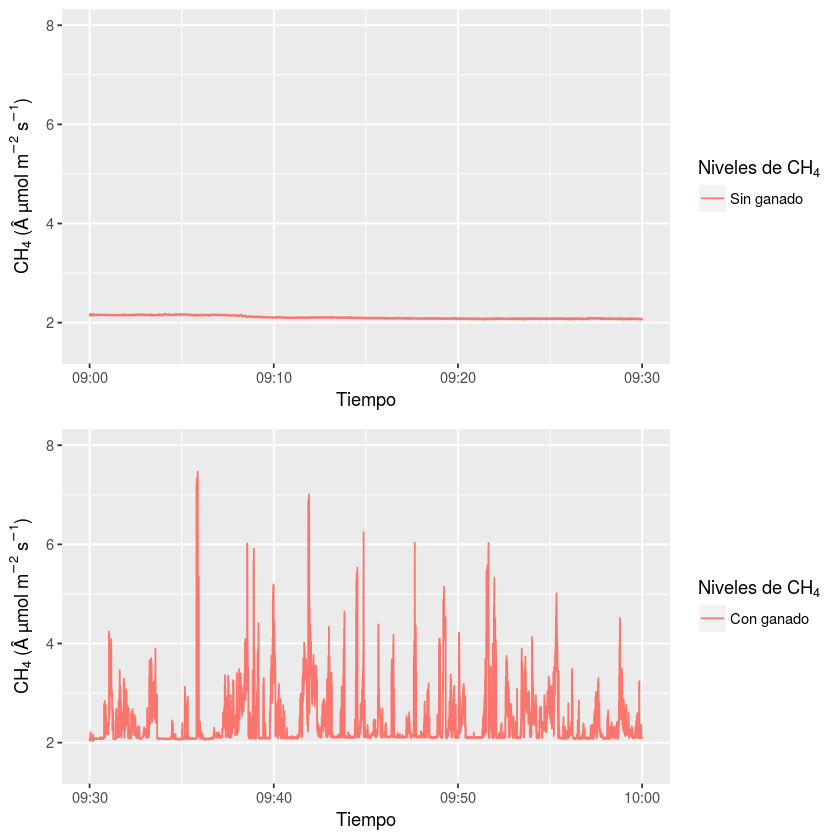

In [94]:
require(ggplot2)
require(oce)
require(gridExtra)
p1 <- ggplot(df_corral1, aes(Time, despike(Concentracion_CH4, reference="smooth"), color="Sin ganado" ) ) + geom_line() + 
      ylab(expression(paste(CH[4]," (Â µmol ", m^-2, " ", s^-1,")"))) + xlab("Tiempo") +
      guides(color=guide_legend(expression(paste("Niveles de ", CH[4]))))+
      ylim(1.5, 8.0)

#print(p1)
           
p2 <- ggplot(df_corral2, aes(Time, despike(Concentracion_CH4, reference="smooth"), color="Con ganado") ) + geom_line() +
      ylab(expression(paste(CH[4]," (Â µmol ", m^-2, " ", s^-1,")"))) + xlab("Tiempo") +
      guides(color=guide_legend(expression(paste("Niveles de ", CH[4]))))+
      ylim(1.5, 8.0)
#print(p2)

grid.arrange(p1, p2, nrow = 2)

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


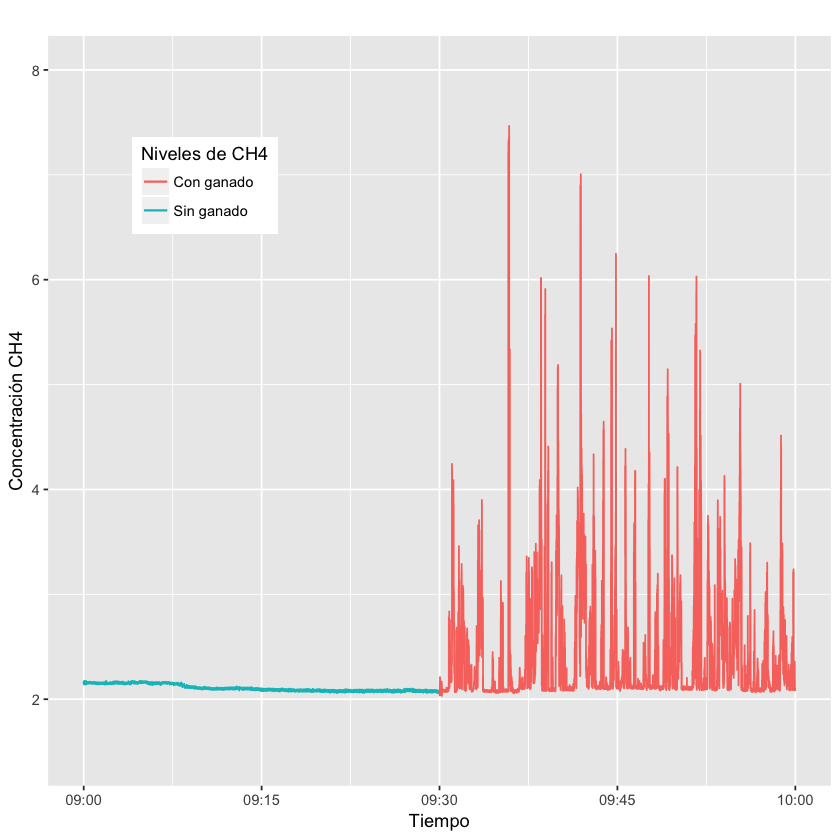

In [128]:
require(dplyr)
require(oce)

df_corral_period_1 <- subset(df_corral1, Time > "2018-01-26 09:00:00.00" & Time < "2018-01-26 09:29:59.90")
df_corral_period_2 <- subset(df_corral2, Time > "2018-01-26 09:30:00.00" & Time < "2018-01-26 09:59:59.90")


p <- ggplot(df_corral_period_1, aes(Time, despike(Concentracion_CH4, reference="smooth"), color="Sin ganado" )) + 
            geom_line() + ylim(1.5, 8.0) + 
            labs(title = "", x = "Tiempo", y= "Concentración CH4") +
            guides(color=guide_legend("Niveles de CH4"))
p <- p + geom_line(data=df_corral_period_2, aes(Time, despike(Concentracion_CH4, reference="smooth"), color="Con ganado")) +
      theme(legend.position = c(0.2, 0.8)) + ylim(1.5, 8.0)

print(p)


#q <- ggplot(df_corral_period, aes(Date, despike(ch4_flux, reference="smooth"), color="Ganado comiendo" )) + 
#            geom_line() + ylim(1.5, 5.0) + 
#            labs(title = "Serie de tiempo de niveles de CH4", x = "Time", y= "Flujo CH4") +
#            guides(color=guide_legend("Niveles de CH4"))
#q <- q + geom_line(data=df_corral_period_ref, aes(Date, despike(ch4_flux, reference="smooth"), color="Nivel de referencia base"))

#print(q)


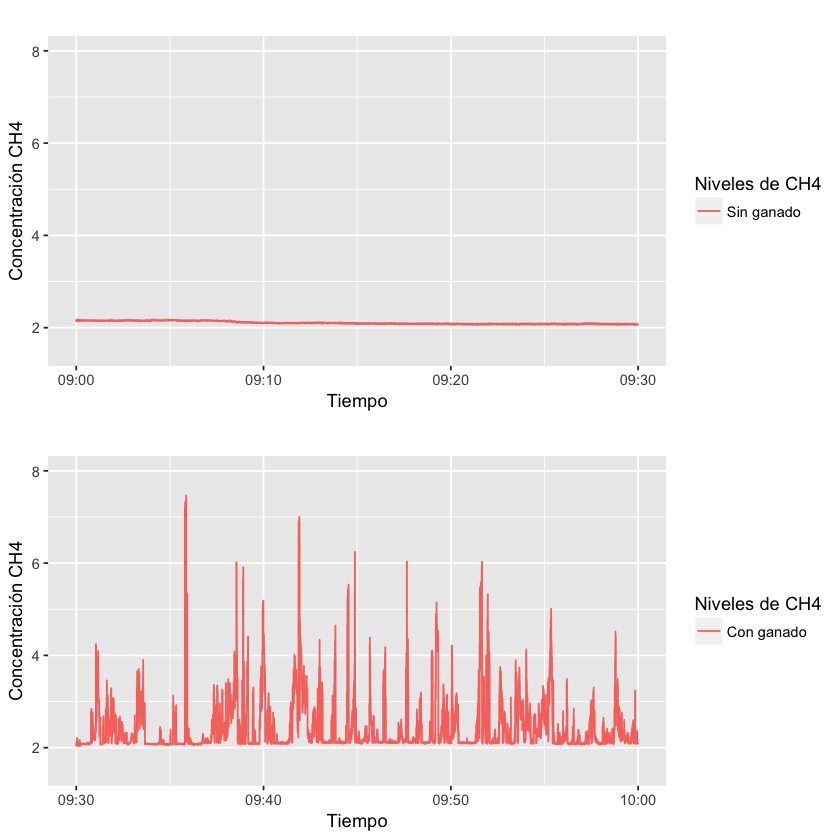

In [129]:
library(gridExtra)
grid.arrange(p1, p2, nrow = 2)

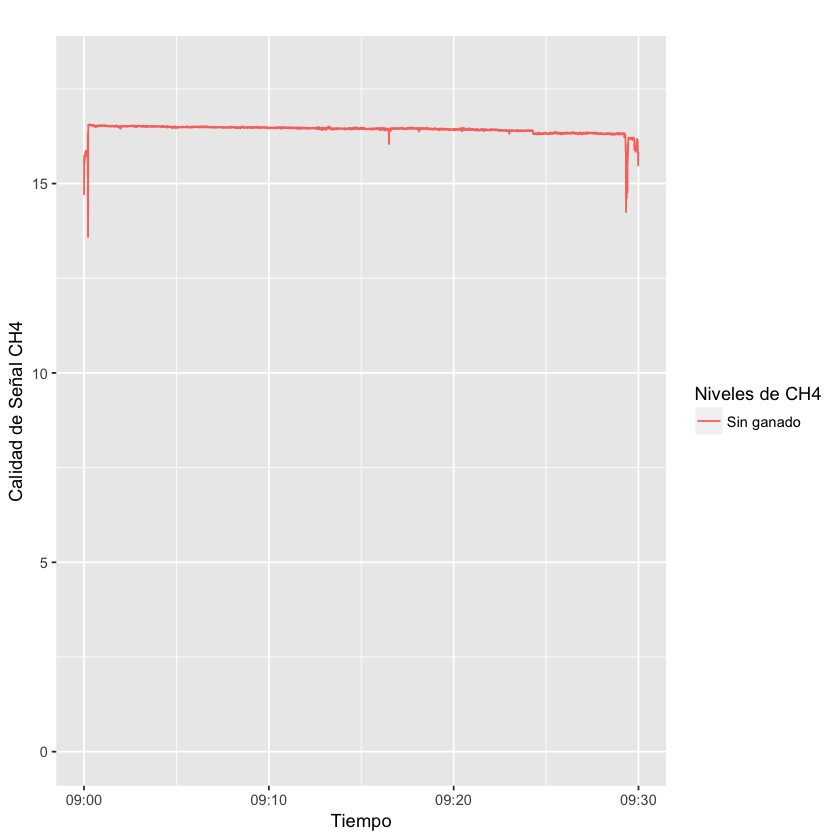

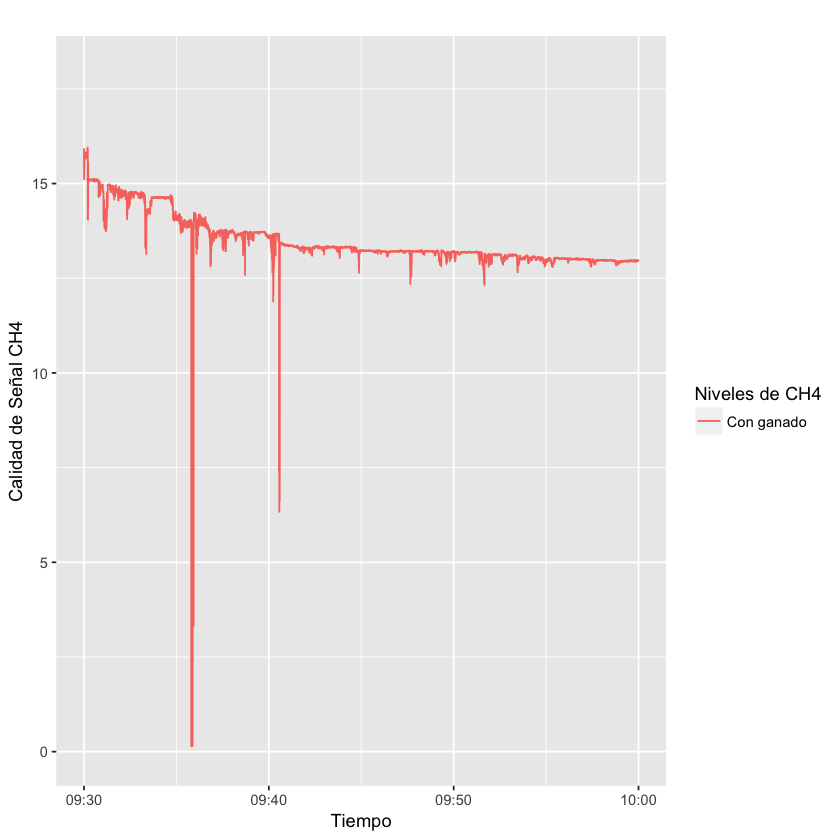

In [142]:
# Signal strength
require(ggplot2)
p1 <- ggplot(df_corral1, aes(Time, despike(Intensidad_de_Señal, reference="smooth"), color="Sin ganado" ) ) + geom_line() + 
      labs(title = "", x = "Tiempo", y= "Calidad de Señal CH4") + guides(color=guide_legend("Niveles de CH4")) +
      ylim(0.0, 18.0)
print(p1)
p2 <- ggplot(df_corral2, aes(Time, despike(Intensidad_de_Señal, reference="smooth"), color="Con ganado") ) + geom_line() +
      labs(title = "", x = "Tiempo", y= "Calidad de Señal CH4") + guides(color=guide_legend("Niveles de CH4")) +
      ylim(0.0, 18.0)
print(p2)

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


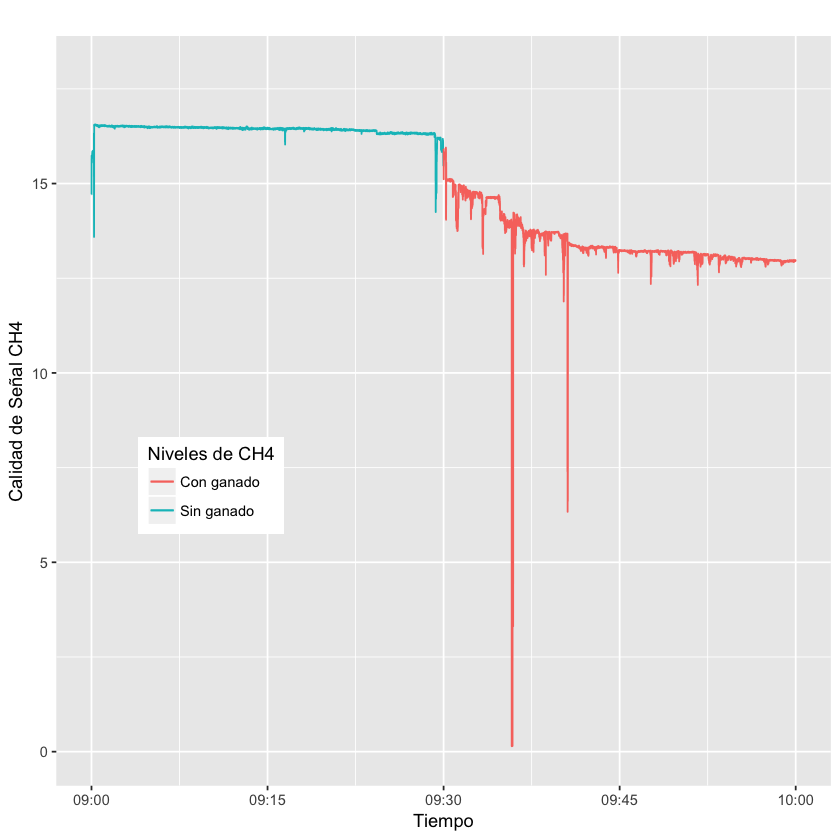

In [145]:
require(dplyr)
require(oce)

df_corral_period_1 <- subset(df_corral1, Time > "2018-01-26 09:00:00.00" & Time < "2018-01-26 09:29:59.90")
df_corral_period_2 <- subset(df_corral2, Time > "2018-01-26 09:30:00.00" & Time < "2018-01-26 09:59:59.90")


p <- ggplot(df_corral_period_1, aes(Time, despike(Intensidad_de_Señal, reference="smooth"), color="Sin ganado" )) + 
            geom_line() + ylim(0.0, 18.0) + 
            labs(title = "", x = "Tiempo", y= "Calidad de Señal CH4") +
            guides(color=guide_legend("Niveles de CH4"))
p <- p + geom_line(data=df_corral_period_2, aes(Time, despike(Intensidad_de_Señal, reference="smooth"), color="Con ganado")) +
      theme(legend.position = c(0.2, 0.4)) + ylim(0.0, 18.0)

print(p)



Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [ ]:
# Old stuff
require(dplyr)
require(oce)

df_corral_period <- subset(df_corral1, Date > "2017-12-04 18:00" & Date < "2017-12-05 00:00")
df_corral_period_ref <- subset(df_corral1, Date > "2017-12-04 12:00" & Date < "2017-12-04 18:00")

p <- ggplot(df_corral_period, aes(Date, despike(ch4_mixing_ratio, reference="smooth"), color="orange")) + geom_line()
p <- p + geom_line(df_corral_period_ref, aes(Date, despike(ch4_mixing_ratio), color="")) + 
        labs(title = "CH4 time series",
           x = "Time", y= "CH4 mixing ratio") +
           guides(color=guide_legend("Despiked"))
print(p)

#q <- ggplot(df_corral_period, aes(Date, despike(ch4_mixing_ratio, reference="smooth"), color="blue")) + 
#     geom_line(df_corral_period_ref, aes(Date, despike(ch4_mixing_ratio), color="orange")) + 
#     ylim(1.5, 7.5)
#q <- q + labs(title = "CH4 time series",
#           x = "Time", y= "CH4 mixing ratio") +
#           guides(color=guide_legend("Despiked - smooth")) + ylim(1.5, 4.5)
#print(q)



In [ ]:
require(oce)
df_corral_period <- subset(df_corral1, Date> "2017-12-04 18:00" & Date < "2017-12-05 00:00")
df_corral_period_ref <- subset(df_corral1, Date > "2017-12-04 12:00" & Date < "2017-12-04 18:00")

p <- ggplot(df_corral_period, aes(Date, despike(ch4_mixing_ratio, reference="smooth"), color="Ganado comiendo" )) + 
            geom_line() + ylim(1.5, 5.0) + 
            labs(title = "Serie de tiempo de niveles de CH4", x = "Tiempo", y= "tasa de mezclado CH4 (\xe5\xb5mol+1mol_d-1)") +
            guides(color=guide_legend("Niveles de CH4"))
p <- p + geom_line(data=df_corral_period_ref, aes(Date, despike(ch4_mixing_ratio, reference="smooth"), color="Referencia base"))

print(p)


q <- ggplot(df_corral_period, aes(Date, despike(ch4_flux, reference="smooth"), color="Ganado comiendo" )) + 
            geom_line() + ylim(1.5, 5.0) + 
            labs(title = "Serie de tiempo de niveles de CH4", x = "Time", y= "Flujo CH4") +
            guides(color=guide_legend("Niveles de CH4"))
q <- q + geom_line(data=df_corral_period_ref, aes(Date, despike(ch4_flux, reference="smooth"), color="Nivel de referencia base"))

print(q)



In [ ]:
# Old stuff
df_corral_period_ref <- subset(df_corral1, Date> "2017-12-04 18:00" & Date < "2017-12-04 19:00")


p <- ggplot(df_corral_period_ref, aes(Date, ch4_mixing_ratio) ) + geom_line() + ylim(1.5, 2.5)
p <- p + geom_line(data=df_corral_period_ref, aes(Date, despike(ch4_mixing_ratio), color="orange")) +
           labs(title = "CH4 time series - backgound value",
           x = "Time", y= "CH4 mixing ratio") +
           guides(color=guide_legend("Despiked"))
print(p)

q <- ggplot(df_corral_period_ref, aes(Date, ch4_mixing_ratio) ) + geom_line() + ylim(1.5, 2.5)
q <- q + geom_line(data=df_corral_period_ref, aes(Date, despike(ch4_mixing_ratio, reference="smooth"), color="orange")) +
           labs(title = "CH4 time series - backgound value",
           x = "Time", y= "CH4 mixing ratio") +
           guides(color=guide_legend("Despiked - smooth"))
print(q)



In [ ]:
df_corral_period_peak <- subset(df_corral1, Date> "2017-12-04 21:00" & Date < "2017-12-04 22:00")

p <- ggplot(df_corral_period_peak, aes(Date, ch4_mixing_ratio) ) + geom_line() + ylim(1.5, 7.5)
p <- p + geom_line(data=df_corral_period_peak, aes(Date, despike(ch4_mixing_ratio), color="orange")) +
           labs(title = "CH4 time series",
           x = "Time", y= "CH4 mixing ratio - near peak") +
           guides(color=guide_legend("Despiked"))
print(p)

q <- ggplot(df_corral_period_peak, aes(Date, ch4_mixing_ratio) ) + geom_line() + ylim(1.5, 7.5)
q <- q + geom_line(data=df_corral_period_peak, aes(Date, despike(ch4_mixing_ratio, reference="smooth"), color="orange")) +
           labs(title = "CH4 time series near peak",
           x = "Time", y= "CH4 mixing ratio") +
           guides(color=guide_legend("Despiked - smooth"))
print(q)



In [ ]:
names(df_corral1)

In [ ]:
# ch4 flux vs time lag (Full range)
df_corral_period <- subset(df_corral1, Date> "2017-12-04 18:00" & Date < "2017-12-04 22:00")


p <- ggplot(df_corral_period, aes(ch4_time_lag, ch4_flux) ) + geom_line() # + ylim(1.5, 2.5)
p <- p + geom_line(data=df_corral_period, aes(ch4_time_lag, despike(ch4_flux), color="orange")) +
           labs(title = "CH4 time series - full range",
           x = "CH4 Time Lag (s)", y= "CH4 flux") +
           guides(color=guide_legend("Despiked"))
print(p)

q <- ggplot(df_corral_period, aes(ch4_time_lag, ch4_flux) ) + geom_line() # + ylim(1.5, 2.5)
q <- q + geom_line(data=df_corral_period_ref, aes(ch4_time_lag, despike(ch4_flux, reference="smooth"), color="orange")) +
           labs(title = "CH4 time series - full tange",
           x = "CH4 Time Lag (s)", y= "CH4 flux") +
           guides(color=guide_legend("Despiked - smooth"))
print(q)




In [ ]:
# ch4 flux vs time lag (Background Values)
df_corral_period_ref <- subset(df_corral1, Date> "2017-12-04 18:00" & Date < "2017-12-04 19:00")


p <- ggplot(df_corral_period_ref, aes(ch4_time_lag, ch4_flux) ) + geom_line() # + ylim(1.5, 2.5)
p <- p + geom_line(data=df_corral_period_ref, aes(ch4_time_lag, despike(ch4_flux), color="orange")) +
           labs(title = "CH4 time series - backgound value",
           x = "CH4 Time Lag (s)", y= "CH4 flux") +
           guides(color=guide_legend("Despiked"))
print(p)

q <- ggplot(df_corral_period_ref, aes(ch4_time_lag, ch4_flux) ) + geom_line() # + ylim(1.5, 2.5)
q <- q + geom_line(data=df_corral_period_ref, aes(ch4_time_lag, despike(ch4_flux, reference="smooth"), color="orange")) +
           labs(title = "CH4 time series - backgound value",
           x = "CH4 Time Lag (s)", y= "CH4 flux") +
           guides(color=guide_legend("Despiked - smooth"))
print(q)



In [ ]:
# ch4 flux vs time lag (Near peak Values)
df_corral_period_peak <- subset(df_corral1, Date> "2017-12-04 21:00" & Date < "2017-12-04 22:00")


p <- ggplot(df_corral_period_peak, aes(ch4_time_lag, ch4_flux) ) + geom_line() # + ylim(1.5, 2.5)
p <- p + geom_line(data=df_corral_period_peak, aes(ch4_time_lag, despike(ch4_flux), color="orange")) +
           labs(title = "CH4 time series - near peak value",
           x = "CH4 Time Lag (s)", y= "CH4 flux") +
           guides(color=guide_legend("Despiked"))
print(p)

q <- ggplot(df_corral_period_peak, aes(ch4_time_lag, ch4_flux) ) + geom_line() # + ylim(1.5, 2.5)
q <- q + geom_line(data=df_corral_period_peak, aes(ch4_time_lag, despike(ch4_flux, reference="smooth"), color="orange")) +
           labs(title = "CH4 time series - near peak value",
           x = "CH4 Time Lag (s)", y= "CH4 flux") +
           guides(color=guide_legend("Despiked - smooth"))
print(q)




In [ ]:
# co2 & ch4 fluxes, u*
# 
require(oce)
df_corral_period <- subset(df_corral1, Date> "2017-12-04 18:00" & Date < "2017-12-04 22:00")

p <- ggplot(df_corral_period, aes(x = Date))
p <- p + geom_line(aes(y = despike(co2_flux, reference="smooth"), colour="CO2 Flux")) 
p <- p + geom_line(aes(y = despike(ch4_flux, reference="smooth"), colour="CH4 Flux"))
p
p <- p + geom_line(aes(y = 10.0*u_star, colour="u star"))
p <- p + scale_y_continuous(sec.axis = sec_axis(~.*5, name = "10 * u star [m/s]")) 
p <- p + scale_colour_manual(values = c("brown1", "cyan3", "forestgreen"))
p <- p + labs(y="Fluxes", x="date", colour="Parameter")
p <- p + theme(legend.position = c(0.8, 0.9))
p


In [ ]:
ggplot(df_corral_period, aes(co2_flux, ch4_flux)) + geom_point()

In [ ]:
p <- ggplot(df_corral_period, aes(x = co2_flux, y = ch4_flux)) + geom_point()
p + stat_smooth(method = "gam", formula = y ~ s(x, k = 3), size = 1, colour = "violet") +
ggtitle("Correlación CO2-CH4 modelo GAM")
cor(df_corral_period$co2_flux, df_corral_period$ch4_flux, na.rm=TRUE)

In [ ]:
# OLD Stuff
# La velocidad del viento, vel max y dirección estan en columnas X, X.1, X.2
# Convertir columnas a numérico
require(dplyr)
df_Wind <- subset(df_dist, select=c("date", "time", "wind_speed", "wind_dir"))
names(df_Wind) <- c("date", "hours", "spd", "dir")
df_Wind <- df_Wind[complete.cases(df_Wind), ]
#df_Wind[] <- lapply(df_Wind, as.numeric)
df_Wind$Date <- as.POSIXct(paste(df_Wind$date, df_Wind$hours), format="%Y-%m-%d %H:%M")
#df_Wind$time <- with(df_Wind, as.POSIXct(paste(date, hours)))
df_Wind$spd <- as.numeric(df_Wind$spd)
df_Wind$dir <- as.numeric(df_Wind$dir)
head(df_Wind)

In [ ]:
head(df_Wind)
str(df_Wind)

In [ ]:
# Definiendo la fecha a partir del 2017-01-01
# today<-as.POSIXct('2017-11-05 00:00:00 EST')
# Conversión a segundos: Inicio + DOY*86400 + Hour*3600
# df_Wind$Date <- today + (df_Wind$DOY-1.0)*86400 

In [ ]:
data <- df_Wind
head(data)
str(data)

In [ ]:
require(ggplot2)
require(RColorBrewer)

In [ ]:
plot.windrose <- function(data,
                      spd,
                      dir,
                      spdres = 0.5,
                      dirres = 30,
                      spdmin = 1,
                      spdmax = 20,
                      spdseq = NULL,
                      palette = "RdPu",
                      countmax = NA,
                      debug = 0){


# Look to see what data was passed in to the function
  if (is.numeric(spd) & is.numeric(dir)){
    # assume that we've been given vectors of the speed and direction vectors
    data <- data.frame(spd = spd,
                       dir = dir)
    spd = "spd"
    dir = "dir"
  } else if (exists("data")){
    # Assume that we've been given a data frame, and the name of the speed 
    # and direction columns. This is the format we want for later use.    
  }  

  # Tidy up input data ----
  n.in <- NROW(data)
  dnu <- (is.na(data[[spd]]) | is.na(data[[dir]]))
  data[[spd]][dnu] <- NA
  data[[dir]][dnu] <- NA

  # figure out the wind speed bins ----
  if (missing(spdseq)){
    spdseq <- seq(spdmin,spdmax,spdres)
  } else {
    if (debug >0){
      cat("Using custom speed bins \n")
    }
  }
  # get some information about the number of bins, etc.
  n.spd.seq <- length(spdseq)
  n.colors.in.range <- n.spd.seq - 1

  # create the color map
  spd.colors <- colorRampPalette(brewer.pal(min(max(3,
                                                    n.colors.in.range),
                                                min(9,
                                                    n.colors.in.range)),                                               
                                            palette))(n.colors.in.range)

  if (max(data[[spd]],na.rm = TRUE) > spdmax){    
    spd.breaks <- c(spdseq,
                    max(data[[spd]],na.rm = TRUE))
    spd.labels <- c(paste(c(spdseq[1:n.spd.seq-1]),
                          '-',
                          c(spdseq[2:n.spd.seq])),
                    paste(spdmax,
                          "-",
                          max(data[[spd]],na.rm = TRUE)))
    spd.colors <- c(spd.colors, "grey50")
  } else{
    spd.breaks <- spdseq
    spd.labels <- paste(c(spdseq[1:n.spd.seq-1]),
                        '-',
                        c(spdseq[2:n.spd.seq]))    
  }
  data$spd.binned <- cut(x = data[[spd]],
                         breaks = spd.breaks,
                         labels = spd.labels,
                         ordered_result = TRUE)
  # clean up the data
  data. <- na.omit(data)

  # figure out the wind direction bins
  dir.breaks <- c(-dirres/2,
                  seq(dirres/2, 360-dirres/2, by = dirres),
                  360+dirres/2)  
  dir.labels <- c(paste(360-dirres/2,"-",dirres/2),
                  paste(seq(dirres/2, 360-3*dirres/2, by = dirres),
                        "-",
                        seq(3*dirres/2, 360-dirres/2, by = dirres)),
                  paste(360-dirres/2,"-",dirres/2))
  # assign each wind direction to a bin
  dir.binned <- cut(data[[dir]],
                    breaks = dir.breaks,
                    ordered_result = TRUE)
  levels(dir.binned) <- dir.labels
  data$dir.binned <- dir.binned

  # Run debug if required ----
  if (debug>0){    
    cat(dir.breaks,"\n")
    cat(dir.labels,"\n")
    cat(levels(dir.binned),"\n")       
  }  

  # deal with change in ordering introduced somewhere around version 2.2
  if(packageVersion("ggplot2") > "2.2"){    
    cat("Hadley broke my code\n")
    data$spd.binned = with(data, factor(spd.binned, levels = rev(levels(spd.binned))))
    spd.colors = rev(spd.colors)
  }

  # create the plot ----
  p.windrose <- ggplot(data = data,
                       aes(x = dir.binned,
                           fill = spd.binned)) +
    geom_bar() + 
    scale_x_discrete(drop = FALSE,
                     labels = waiver()) +
    coord_polar(start = -((dirres/2)/360) * 2*pi) +
    scale_fill_manual(name = "Velocidad (m/s)", 
                      values = spd.colors,
                      drop = FALSE) +
    #theme_bw() +
    theme(axis.title.x = element_blank(),
          #panel.border = element_rect(colour = "blank"),
          panel.grid.major = element_line(colour="grey65"))

  # adjust axes if required
  if (!is.na(countmax)){
    p.windrose <- p.windrose +
      ylim(c(0,countmax))
  }

  # print the plot
  print(p.windrose)  

  # return the handle to the wind rose
  return(p.windrose)
}


In [ ]:
# try the default settings
p1 <- plot.windrose(spd = df_Wind$spd,
                   dir = df_Wind$dir)

In [ ]:
p2 <- plot.windrose(data=df_Wind, spd = df_Wind$spd,
                   dir = df_Wind$dir,
#                   spdseq = c(0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6)) +
                     spdseq = c(0,1,2,3,4,5,6)) +
                   ggtitle("Vientos - Metano en Corrales") +
                   ylab("Frecuencia") # for the main title
p2

In [ ]:
# Mixing ratios
require(dplyr)
df_gases <- subset(df_dist, select=c("date", "time", "co2_flux", "co2_mixing_ratio", 
                                        "co2_time_lag", "ch4_flux", "ch4_mixing_ratio", 
                                        "ch4_time_lag"))
names(df_gases) <- c("date", "hours", "co2flux", "co2mix", "co2tlag", "ch4flux", "ch4mix", "ch4tlag")
df_gases <- df_gases[complete.cases(df_gases), ]
#df_Wind[] <- lapply(df_Wind, as.numeric)
df_gases$Date <- as.POSIXct(paste(df_gases$date, df_gases$hours), format="%Y-%m-%d %H:%M")
#df_Wind$time <- with(df_Wind, as.POSIXct(paste(date, hours)))
df_gases$co2flux <- as.numeric(df_gases$co2flux)
df_gases$co2mix <- as.numeric(df_gases$co2mix)
df_gases$co2tlag <- as.numeric(df_gases$co2tlag)
df_gases$ch4flux <- as.numeric(df_gases$ch4flux)
df_gases$ch4mix <- as.numeric(df_gases$ch4mix)
df_gases$ch4tlag <- as.numeric(df_gases$ch4tlag)
head(df_gases)

In [ ]:
#ggplot(df_gases, aes(Date, ch4flux)) + xlab("Time") + ylab("CH4 flux")
ggplot() + # geom_line(data=df_gases, aes(x=Date, y=co2flux), color="brown", na.rm=TRUE) +
            geom_point(data=df_gases, aes(x=Date, y=ch4flux), color="brown", na.rm=TRUE) +
           ggtitle("CH4 Flux") +
           xlab("Date") + ylab("Flux")

In [ ]:
ggplot(df_gases, aes(co2flux, ch4flux)) +
           geom_point(na.rm=TRUE, color="blue", size=1) + 
           ggtitle("CO2/CH4 Flux") +
           xlab("CO2 Flux") + ylab("CH4 Flux")

In [ ]:
# Opción 
# Calcular Vientos diurnos
# 
#require(dplyr)
#require(lubridate)
#result <- with( df_Wind , df_Wind[ hour(df_Wind$Date) >= 6 & hour(df_Wind$Date) < 18 , ])
#head(result)

In [ ]:
data <- result
head(data)
str(data)

In [ ]:
plot.windrose <- function(data,
                      spd,
                      dir,
                      spdres = 1,
                      dirres = 30,
                      spdmin = 1,
                      spdmax = 20,
                      spdseq = NULL,
                      palette = "RdPu",
                      countmax = NA,
                      debug = 0){


# Look to see what data was passed in to the function
  if (is.numeric(spd) & is.numeric(dir)){
    # assume that we've been given vectors of the speed and direction vectors
    data <- data.frame(spd = spd,
                       dir = dir)
    spd = "spd"
    dir = "dir"
  } else if (exists("data")){
    # Assume that we've been given a data frame, and the name of the speed 
    # and direction columns. This is the format we want for later use.    
  }  

  # Tidy up input data ----
  n.in <- NROW(data)
  dnu <- (is.na(data[[spd]]) | is.na(data[[dir]]))
  data[[spd]][dnu] <- NA
  data[[dir]][dnu] <- NA

  # figure out the wind speed bins ----
  if (missing(spdseq)){
    spdseq <- seq(spdmin,spdmax,spdres)
  } else {
    if (debug >0){
      cat("Using custom speed bins \n")
    }
  }
  # get some information about the number of bins, etc.
  n.spd.seq <- length(spdseq)
  n.colors.in.range <- n.spd.seq - 1

  # create the color map
  spd.colors <- colorRampPalette(brewer.pal(min(max(3,
                                                    n.colors.in.range),
                                                min(9,
                                                    n.colors.in.range)),                                               
                                            palette))(n.colors.in.range)

  if (max(data[[spd]],na.rm = TRUE) > spdmax){    
    spd.breaks <- c(spdseq,
                    max(data[[spd]],na.rm = TRUE))
    spd.labels <- c(paste(c(spdseq[1:n.spd.seq-1]),
                          '-',
                          c(spdseq[2:n.spd.seq])),
                    paste(spdmax,
                          "-",
                          max(data[[spd]],na.rm = TRUE)))
    spd.colors <- c(spd.colors, "grey50")
  } else{
    spd.breaks <- spdseq
    spd.labels <- paste(c(spdseq[1:n.spd.seq-1]),
                        '-',
                        c(spdseq[2:n.spd.seq]))    
  }
  data$spd.binned <- cut(x = data[[spd]],
                         breaks = spd.breaks,
                         labels = spd.labels,
                         ordered_result = TRUE)
  # clean up the data
  data. <- na.omit(data)

  # figure out the wind direction bins
  dir.breaks <- c(-dirres/2,
                  seq(dirres/2, 360-dirres/2, by = dirres),
                  360+dirres/2)  
  dir.labels <- c(paste(360-dirres/2,"-",dirres/2),
                  paste(seq(dirres/2, 360-3*dirres/2, by = dirres),
                        "-",
                        seq(3*dirres/2, 360-dirres/2, by = dirres)),
                  paste(360-dirres/2,"-",dirres/2))
  # assign each wind direction to a bin
  dir.binned <- cut(data[[dir]],
                    breaks = dir.breaks,
                    ordered_result = TRUE)
  levels(dir.binned) <- dir.labels
  data$dir.binned <- dir.binned

  # Run debug if required ----
  if (debug>0){    
    cat(dir.breaks,"\n")
    cat(dir.labels,"\n")
    cat(levels(dir.binned),"\n")       
  }  

  # deal with change in ordering introduced somewhere around version 2.2
  if(packageVersion("ggplot2") > "2.2"){    
    cat("Hadley broke my code\n")
    data$spd.binned = with(data, factor(spd.binned, levels = rev(levels(spd.binned))))
    spd.colors = rev(spd.colors)
  }

  # create the plot ----
  p.windrose <- ggplot(data = data,
                       aes(x = dir.binned,
                           fill = spd.binned)) +
    geom_bar() + 
    scale_x_discrete(drop = FALSE,
                     labels = waiver()) +
    coord_polar(start = -((dirres/2)/360) * 2*pi) +
    scale_fill_manual(name = "Wind Speed (m/s)", 
                      values = spd.colors,
                      drop = FALSE) +
    #theme_bw() +
    theme(axis.title.x = element_blank(),
          #panel.border = element_rect(colour = "blank"),
          panel.grid.major = element_line(colour="grey65"))

  # adjust axes if required
  if (!is.na(countmax)){
    p.windrose <- p.windrose +
      ylim(c(0,countmax))
  }

  # print the plot
  print(p.windrose)  

  # return the handle to the wind rose
  return(p.windrose)
}



In [ ]:
p2 <- plot.windrose(data=df_Wind, spd = df_Wind$spd,
                   dir = df_Wind$dir,
                   spdseq = c(0,1,2,3,4,5,6)) +
                   ggtitle("Vientos Diurnos (6AM-6PM) - Metano en Corrales") # for the main title
p2

In [ ]:
install.packages('oce', repos='http://cran.us.r-project.org')

In [ ]:
require(oce)
n <- 50
x <- 1:n
y <- rnorm(n=n)
y[n/2] <- 10                    # 10 standard deviations
plot(x, y, type='l')
lines(x, despike(y), col='red')
lines(x, despike(y, reference="smooth"), col='darkgreen')
lines(x, despike(y, reference="trim", min=-3, max=3), col='blue')
legend("topright", lwd=1, col=c("black", "red", "darkgreen", "blue"),
       legend=c("raw", "median", "smooth", "trim"))

# add a spike to a CTD object
data(ctd)
plot(ctd)
T <- ctd[["temperature"]]
T[10] <- T[10] + 10
ctd[["temperature"]] <- T
CTD <- despike(ctd)
plot(CTD)

In [ ]:
install.packages("devtools", repos="http://cran.itam.mx")

In [ ]:
install.packages("ggthemes", dependencies=TRUE, repos="https://cran.itam.mx")

In [22]:
install.packages("oce")

also installing the dependencies ‘praise’, ‘gsw’, ‘testthat’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
